In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("C:/Users/Yunsun2/Desktop/Github/College_Data.csv", index_col=0) #set the first col as index: index_col=0
#data.rename(columns={'Unnamed: 0':'University'}, inplace=True)  #to rename first col otherwise; 

In [36]:
data.head(2)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [5]:
data.describe() #may need to feature scale Expend later, not in this analysis; 

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [32]:
data.head(3)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54


In [37]:
sns.pairplot(data, hue='Private')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
data['Private'].value_counts()  #quite balanced labels; 

Yes    565
No     212
Name: Private, dtype: int64

In [4]:
data['private']=(data['Private']!='Yes') #recode the lables to be 0/1 dummy; 
corrmatrix=data.corr()  #corrmatrix is d.f.;
corrmatrix['private']
#most positively correlated: OutState, perc.alumni
#most negatively correlated: F.Undergrad, Enroll 
#visualization of these below

Apps           0.432095
Accept         0.475252
Enroll         0.567908
Top10perc     -0.164132
Top25perc     -0.095752
F.Undergrad    0.615561
P.Undergrad    0.452088
Outstate      -0.552650
Room.Board    -0.340532
Books          0.018549
Personal       0.304485
PhD            0.156714
Terminal       0.129620
S.F.Ratio      0.472205
perc.alumni   -0.414775
Expend        -0.258461
Grad.Rate     -0.336162
private        1.000000
Name: private, dtype: float64

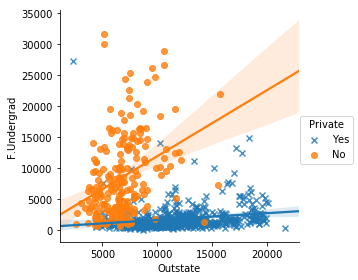

In [293]:
#explainatory visualizations; 
#linear regression model; 
sns.lmplot(x='Outstate', y='F.Undergrad', data=data, hue='Private', markers=['x', 'o'], size=4, aspect=1.1) 
#size of plot, aspect of width/height ratio; 
#hue is the variable to separate the coloring; 

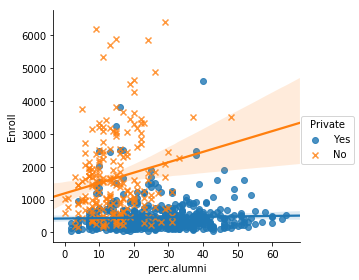

In [25]:
sns.lmplot(x='perc.alumni', y='Enroll', data=data, hue='Private',  markers=['o', 'x'], size=4, aspect=1.1) 

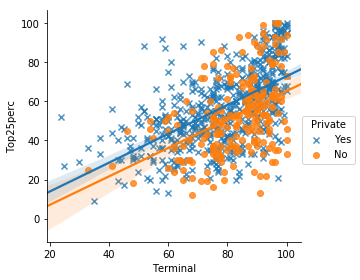

In [295]:
sns.lmplot(x='Terminal', y='Top25perc', data=data, hue='Private', markers=['x', 'o'], size=4, aspect=1.1) 
#Unlike above, here less correlated vars are less differentiable by the label - Private; 

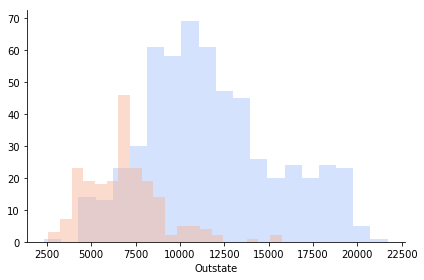

In [291]:
g=sns.FacetGrid(data=data, hue='Private', size=4, aspect=1.5, palette='coolwarm')
g.map(plt.hist, 'Outstate', bins=20, alpha=0.5)  #alpha controls the transparency of overlapping, alpha=1 no display of overlap.

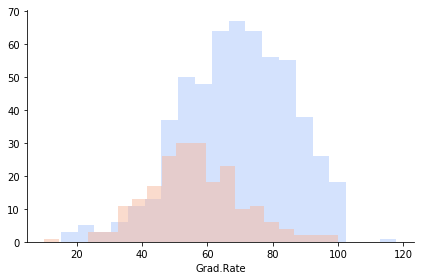

In [292]:
g=sns.FacetGrid(data=data, hue='Private', size=4, aspect=1.5, palette='coolwarm')
g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.5)

In [5]:
#which school has more than 100 graduation rate? --- NOT making sense...
data[data['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,False


In [26]:
#Reset the rate to be 100.
#data[data['Grad.Rate']>100]['Grad.Rate']=100

#another way to do is to use index, since only 1 obs satisfies the condition;
data['Grad.Rate']['Cazenovia College']=100  #Cazenovia College is the row index; 

#double check; 


C:\Users\Yunsun2\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
data[data['Grad.Rate']>100] #none now; 

C:\Users\Yunsun2\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,private
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,False


In [40]:
#outcomes.drop(['cost_of_care_standard', 'cost_of_care_standard2'], axis=1, inplace=True)
from sklearn.cluster import KMeans

Nc = range(1, 10)  #number of clusters; 
Y=data.drop(['Private', 'private'], axis=1)
rs=11400  #Change the random_state to a couple of values for further validation (to avoid local optimum);  
kmeans = [KMeans(n_clusters=i, random_state=rs) for i in Nc]
kmeans

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=11400, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=11400, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=11400, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=11400, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
     n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
     random_state=11400, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++'

In [41]:
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score

[-72040559613.941071,
 -48356202264.492126,
 -32365874599.916042,
 -25519276300.920975,
 -20756223382.426037,
 -17760798925.301418,
 -15728632373.013828,
 -14394841082.25716,
 -13261375448.322969]

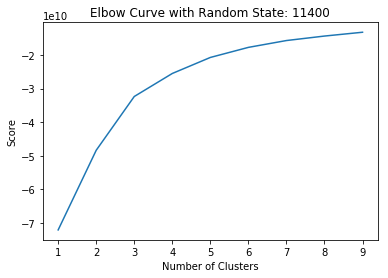

In [42]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
title='Elbow Curve'+' with Random State: '+ str(rs)
plt.title(title)
plt.show()
#The graph suggests cluster to be 3 here (holds for different random_state numbers).    
#Since we have original labels of 2 classes, we use 2 cluster result to compare with original labels. 

In [232]:
data['private'][30:40]

Augustana College          False
Austin College             False
Averett College            False
Baker University           False
Baldwin-Wallace College    False
Barat College              False
Bard College               False
Barnard College            False
Barry University           False
Baylor University          False
Name: private, dtype: bool

In [231]:
kmeans[1].fit(Y).labels_[30:40]  #kmeans[1] -- 2 clusters;  
#note: need to make sure 1 from kmeans predictioin or True from original data frame mean the same thing. 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(data['private'], kmeans[1].fit(Y).labels_))  
print(classification_report(data['private'], kmeans[1].fit(Y).labels_)) 
#kmeans doesn't quite agree with labels here; 

[[531  34]
 [138  74]]
             precision    recall  f1-score   support

      False       0.79      0.94      0.86       565
       True       0.69      0.35      0.46       212

avg / total       0.76      0.78      0.75       777



In [309]:
data2=pd.concat([data, pd.DataFrame(kmeans[1].fit(Y).labels_)], axis=1) #to merge the predicted labels back to the dataset;
data2.rename(columns={0:'Kmeans_labels_2c'}, inplace=True)
data2=pd.concat([data2, pd.DataFrame(kmeans[2].fit(Y).labels_)], axis=1) #to merge the predicted labels back to the dataset;
data2.rename(columns={0:'Kmeans_labels_3c'}, inplace=True)

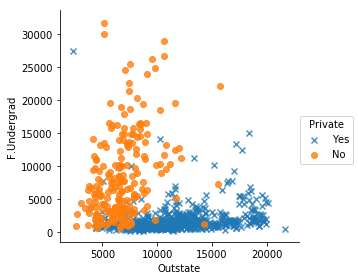

In [283]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=data2, hue='Private', markers=['x', 'o'], size=4, aspect=1.1, fit_reg=False) 

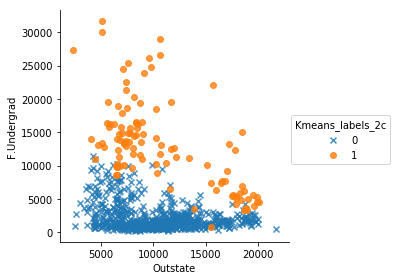

In [313]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=data2, hue='Kmeans_labels_2c', markers=['x', 'o'], size=4, aspect=1.1, fit_reg=False) 

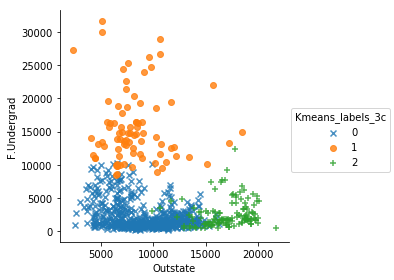

In [317]:
sns.lmplot(x='Outstate', y='F.Undergrad', data=data2, hue='Kmeans_labels_3c', markers=['x', 'o', '+'], size=4, aspect=1.1, fit_reg=False) 

In [330]:
print("Conclusion" + '\n' + "Through visualization, it's found that Kmeans does better separation of than actual labels." + '\n' + 'Low-end private schools indeed, do not different from "public" ones.')
print("There's a wide range of private schools.")    
print('Kmeans elbow method suggests 3-cluster sepration, which better distinguishes high-end and low-end private schools.')

Conclusion
Through visualization, it's found that Kmeans does better separation of than actual labels.
Low-end private schools indeed, do not different from "public" ones.
There's a wide range of private schools.
Kmeans elbow method suggests 3-cluster sepration, which better distinguishes high-end and low-end private schools.


In [7]:
##Try SVM model
#feature scaling 
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

'''
#train-test split;
X=preprocessing.scale(data.drop(['private', 'Private'], axis=1))
Y=data['private']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=9894)
'''

X=data.drop(['private', 'Private'], axis=1)
Y=data['private'] 
x_train, x_test, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=9894) 
std_scale = preprocessing.StandardScaler().fit(x_train)
xtrain = std_scale.transform(x_train)
xtest  = std_scale.transform(x_test)


#results by default setting; 
svc=SVC()
svc.fit(xtrain, ytrain)
pred=svc.predict(xtest)

print('\n' + 'Predictions with default hyparameters'+'\n')
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))


Predictions with default hyparameters

[[161   4]
 [  8  61]]
             precision    recall  f1-score   support

      False       0.95      0.98      0.96       165
       True       0.94      0.88      0.91        69

avg / total       0.95      0.95      0.95       234



In [60]:
#results by gridsearch
from sklearn.grid_search import GridSearchCV
param={'C': [1, 10, 100], 'gamma':[10, 1, 0.1, 0.01, 0.001]}
grid=GridSearchCV(SVC(), param, verbose=2)
grid.fit(xtrain, ytrain)

print(grid.best_params_) 
print(grid.best_estimator_)

gridpred=grid.predict(xtest)
print(confusion_matrix(ytest, gridpred))
print(classification_report(ytest, gridpred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=1, gamma=10 ...................................................
[CV] .......................................... C=1, gamma=10 -   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .......................................... C=1, gamma=10 -   0.0s
[CV] C=1, gamma=10 ...................................................
[CV] .......................................... C=1, gamma=10 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=1 ....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................... C=1, gamma=1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................................... C=1, gamma=0.1 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................................ C=1, gamma=0.01 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................................ C=1, gamma=0.01 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................................ C=1, gamma=0.01 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.0s finished


In [66]:
print('\n' + 'Conclusion: ' + '\n' +'SVM model does better classification than K-means!' + '\n' + 'On the other hand, tuned parameters do not out-perform the default parameters.')


Conclusion: 
SVM model does better classification than K-means!
On the other hand, tuned parameters do not out-perform the default parameters.
